**Logistic Regression with iris dataset**


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**LabelEncoding**

In [10]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Species'] = LE.fit_transform(df['Species'])
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [12]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
x = df.drop(['Id','Species'],axis='columns')
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y = df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

**Traning Model**

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2,random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)

LogisticRegression()

**Measure accuracy of our model**

In [23]:
x_test_predict = LR.predict(xtest)
LR.score(xtest,x_test_predict)

1.0

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,x_test_predict)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

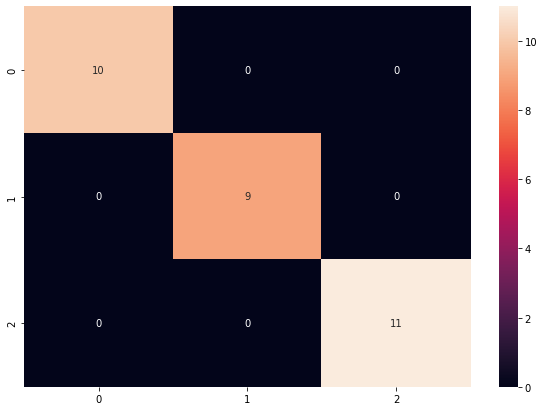

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
plt.xlabel('Predicted')
plt.ylabel('True')
sn.heatmap(cm, annot= True)